### **Prediction of credit fraud detection**

### **Data Preprocessing**

Importing libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
import pip as pip
!pip install miceforest
!pip install --upgrade miceforest
from miceforest import ImputationKernel

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Uploading dataset

In [56]:
# from google.colab import files
# uploaded = files.upload()

url = 'https://raw.githubusercontent.com/iamHareen/Predicting-Credit-Risk-Fraud-Detection/refs/heads/main/fraud_detection_dataset.csv'

Reading dataset

In [57]:
sample_customer_data = pd.read_csv(url)

In [58]:
# head
sample_customer_data.head()

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
0,11/9/2023,56,Los Angeles,Teacher,40099,424.0,108,True,10,3.139572,...,4.0,2,9/11/2018,3/7/2024,3,True,True,False,False,True
1,9/11/2022,69,New York,Engineer,2050,483.0,0,False,1,1.017489,...,3.0,2,3/8/2023,1/28/2024,3,False,True,False,False,False
2,7/12/2020,46,Miami,Engineer,71936,566.0,0,False,1,1.508626,...,2.0,0,4/26/2024,10/3/2024,2,False,False,False,False,False
3,8/13/2024,32,Houston,Banker,15833,NaN,97,True,5,2.995150,...,3.0,1,9/14/2023,10/14/2024,4,False,True,True,False,False
4,7/27/2024,60,Houston,Lawyer,8574,787.0,0,False,1,1.182380,...,NaN,0,11/8/2022,9/2/2024,0,True,False,True,False,False


Sanity check of the data


1. Identifying missing values
2. Identifying duplicates
3. Identifying garbage values (as object data type)


In [59]:
# shape
sample_customer_data.shape

(7000, 23)

In [60]:
# info
sample_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   account_open_date                        7000 non-null   object 
 1   age                                      7000 non-null   int64  
 2   location                                 7000 non-null   object 
 3   occupation                               7000 non-null   object 
 4   income_level                             7000 non-null   int64  
 5   fico_score                               6790 non-null   float64
 6   delinquency_status                       7000 non-null   int64  
 7   charge_off_status                        7000 non-null   bool   
 8   number_of_credit_applications            7000 non-null   int64  
 9   debt_to_income_ratio                     7000 non-null   float64
 10  payment_methods_high_risk                7000 no

Observations



In [61]:
# 1. identifying missing values
sample_customer_data.isnull().sum()

,0
account_open_date,0
age,0
location,0
occupation,0
income_level,0
fico_score,210
delinquency_status,0
charge_off_status,0
number_of_credit_applications,0
debt_to_income_ratio,0


In [62]:
# calculating the percentage of missing values
sample_customer_data.isnull().sum()/sample_customer_data.shape[0]*100

,0
account_open_date,0.0
age,0.0
location,0.0
occupation,0.0
income_level,0.0
fico_score,3.0
delinquency_status,0.0
charge_off_status,0.0
number_of_credit_applications,0.0
debt_to_income_ratio,0.0


In [63]:
# 2. finding duplicates
sample_customer_data.duplicated().sum()

0

In [64]:
# 3. identifying garbage values
for i in sample_customer_data.select_dtypes(include='object').columns:
  print(sample_customer_data[i].value_counts())
  print("*****"*10)

account_open_date
12/3/2020     12
8/29/2021     11
4/17/2021     10
7/27/2023     10
2/6/2021      10
              ..
12/14/2023     1
9/14/2020      1
12/2/2021      1
9/9/2022       1
9/15/2024      1
Name: count, Length: 1785, dtype: int64
**************************************************
location
Los Angeles      722
Boston           722
Dallas           719
Atlanta          717
Chicago          714
Seattle          712
Miami            696
San Francisco    693
New York         654
Houston          651
Name: count, dtype: int64
**************************************************
occupation
Banker                1341
Other                 1270
Teacher               1007
Accountant             887
Consultant             654
Artist                 405
Doctor                 381
Retail Worker          376
Lawyer                 239
Software Developer     237
Engineer               203
Name: count, dtype: int64
**************************************************
earliest_credit_account

### **Exploratory Data Analysis (EDA)**

In [65]:
# converting to datetime
# sample_customer_data['earliest_credit_account'] = pd.to_datetime(sample_customer_data['earliest_credit_account'], format="%d/%m/%Y", errors='raise')
# sample_customer_data['recent_trade_activity'] = pd.to_datetime(sample_customer_data['recent_trade_activity'], format="%d %m %Y", errors='raise')
# sample_customer_data['account_open_date'] = pd.to_datetime(sample_customer_data['account_open_date'], format="%d %m %Y", errors='raise')

# converting to datetime
date_columns = ['earliest_credit_account', 'recent_trade_activity', 'account_open_date']
for col in date_columns:
    sample_customer_data[col] = pd.to_datetime(sample_customer_data[col], errors='coerce')

# creating new variables
sample_customer_data['credit_activity_duration'] = (sample_customer_data['recent_trade_activity'] - sample_customer_data['earliest_credit_account']).dt.days / 365.25
sample_customer_data['account_age_at_last_trade'] = (sample_customer_data['recent_trade_activity'] - sample_customer_data['account_open_date']).dt.days / 365.25

In [66]:
# check
sample_customer_data[sample_customer_data['account_age_at_last_trade'] <= 0].shape[0]

663

In [67]:
# correcting data type as string
sample_customer_data['unusual_submission_pattern'] = sample_customer_data['unusual_submission_pattern'].astype(bool)
sample_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   account_open_date                        7000 non-null   datetime64[ns]
 1   age                                      7000 non-null   int64         
 2   location                                 7000 non-null   object        
 3   occupation                               7000 non-null   object        
 4   income_level                             7000 non-null   int64         
 5   fico_score                               6790 non-null   float64       
 6   delinquency_status                       7000 non-null   int64         
 7   charge_off_status                        7000 non-null   bool          
 8   number_of_credit_applications            7000 non-null   int64         
 9   debt_to_income_ratio                     

In [68]:
# obtaining descriptive statistics
sample_customer_data.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
age,7000.0,46.208857,16.401828,18.000000,32.000000,46.000000,61.000000,74.000000
income_level,7000.0,23739.063714,21846.844041,2000.000000,6927.250000,15014.000000,38299.750000,99957.000000
fico_score,6790.0,616.424448,132.567079,152.000000,520.000000,636.000000,723.000000,943.000000
delinquency_status,7000.0,25.226714,42.709195,0.000000,0.000000,0.000000,29.000000,119.000000
number_of_credit_applications,7000.0,1.813000,1.934719,1.000000,1.000000,1.000000,1.000000,10.000000
debt_to_income_ratio,7000.0,1.477630,0.687469,0.438413,1.052709,1.320565,1.720369,9.975930
max_balance,7000.0,50337.829377,49507.198629,930.516529,25496.283316,44679.410787,70157.462957,999922.083300
avg_balance_last_12months,6650.0,33638.208194,22358.889181,457.869809,13699.263133,30352.353060,52039.232172,92117.793445
number_of_delinquent_accounts,6300.0,1.212857,1.558081,0.000000,0.000000,0.000000,3.000000,4.000000
number_of_defaulted_accounts,7000.0,0.499143,0.729435,0.000000,0.000000,0.000000,1.000000,2.000000


In [69]:
# obtaining descriptive statistics of object data type
sample_customer_data.describe(include='object').T

,count,unique,top,freq
location,7000,10,Los Angeles,722
occupation,7000,11,Banker,1341


In [70]:
# tree map for categorical variables
import plotly.express as px

for column in sample_customer_data.select_dtypes(include='object').columns:
    value_counts = sample_customer_data[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    value_counts['Percentage'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100

    fig = px.treemap(
        value_counts,
        path=[column],
        values='Count',
        title=f'Tree Map for {column}',
        custom_data=['Percentage']  # Add percentages as custom data
    )

    fig.update_traces(
        hovertemplate=f'<b>%{{label}}</b><br>Count: %{{value}}<br>Percentage: %{{customdata[0]:.1f}}%'
    )
    fig.update_layout(
        margin=dict(t=50, l=25, r=25, b=25)
    )
    fig.show()

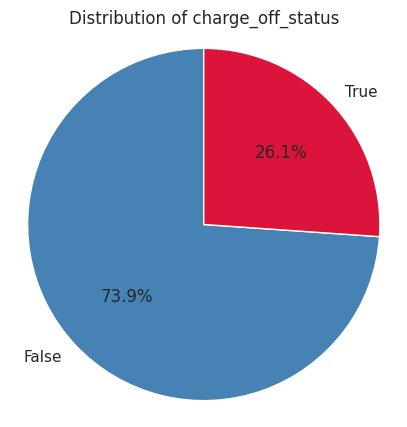

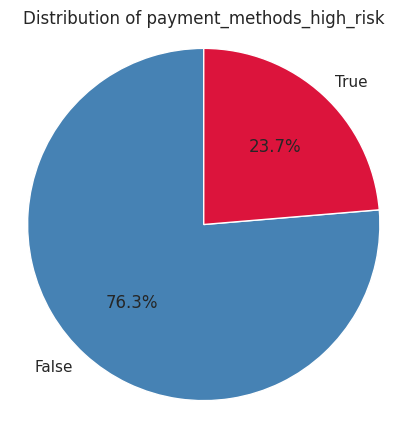

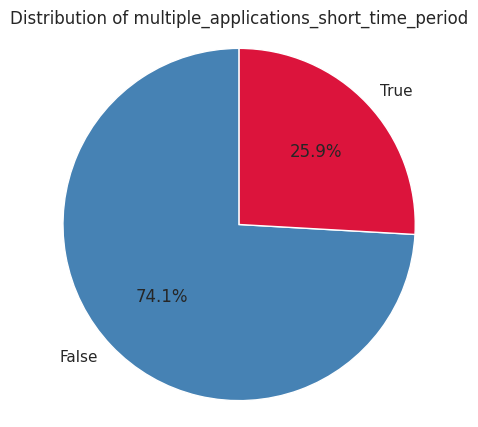

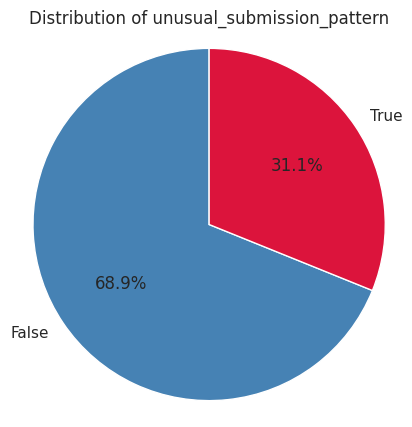

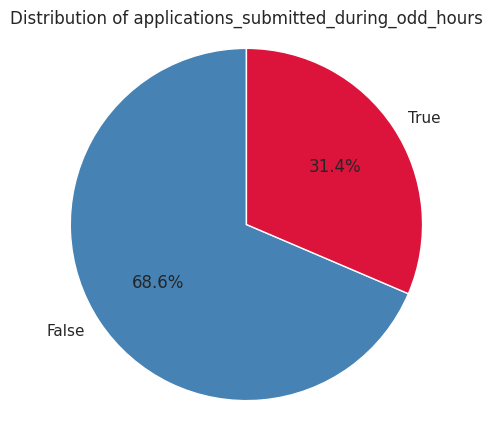

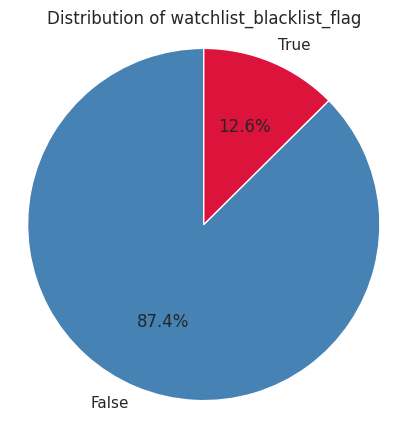

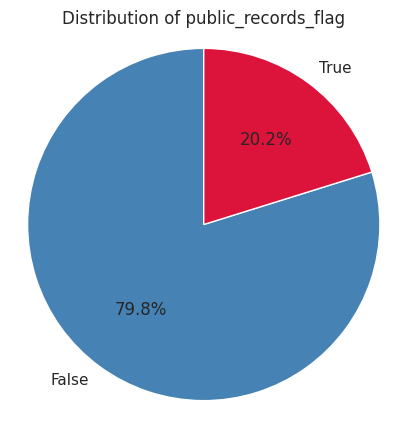

In [71]:
# pie chart for categorical variables
for column in sample_customer_data.select_dtypes(include='bool').columns:
    value_counts = sample_customer_data[column].value_counts(dropna=False)

    labels = value_counts.index.map(lambda x: 'True' if x else 'False')
    sizes = value_counts.values

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['steelblue', 'crimson'])
    plt.title(f'Distribution of {column}')
    plt.axis('equal')
    plt.show()


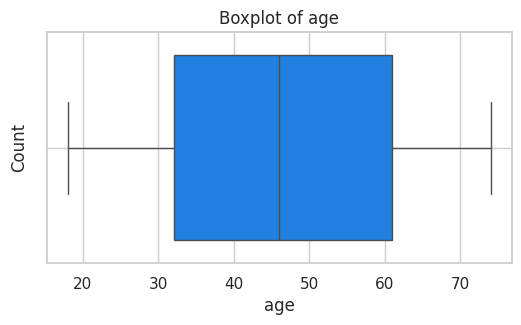

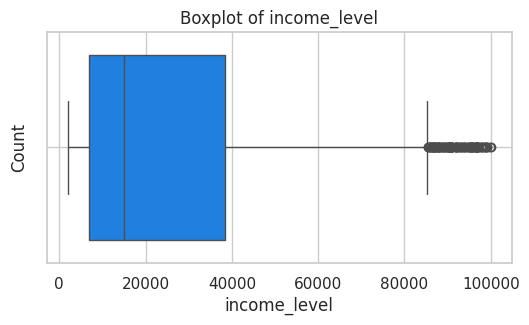

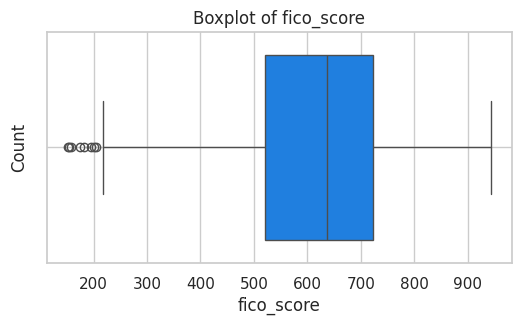

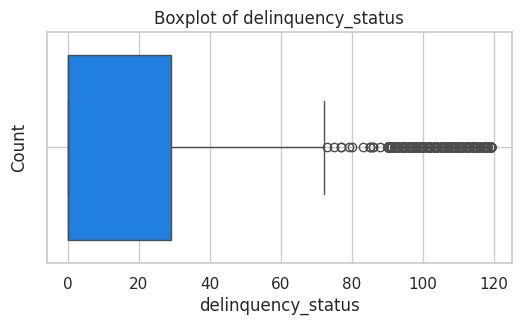

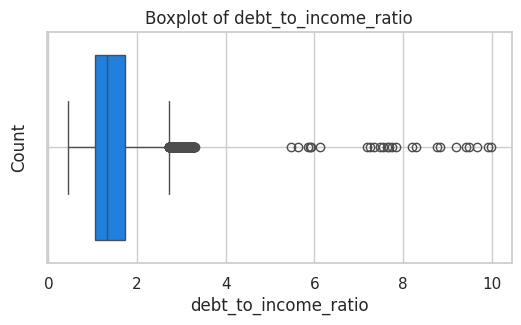

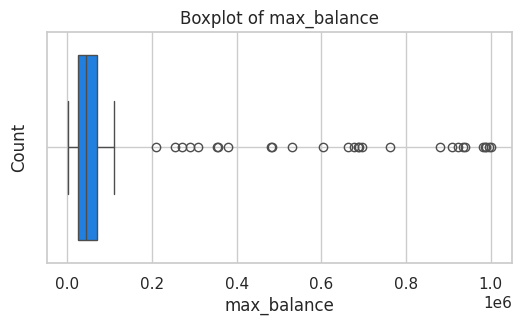

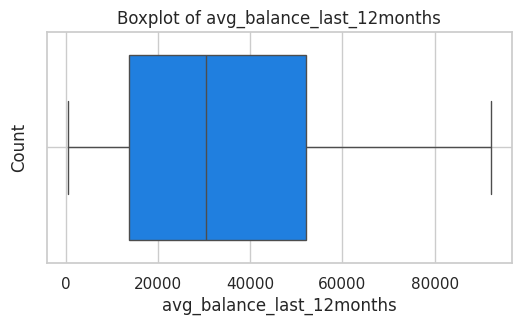

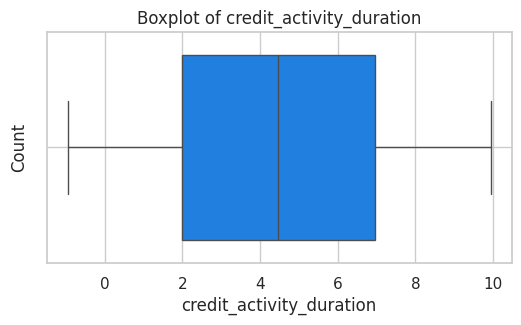

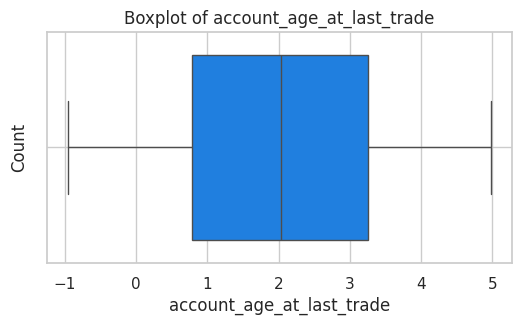

In [72]:
# boxplot for understanding the distributions and outliers
import warnings
warnings.filterwarnings('ignore')

exclude_columns1 = [
    'number_of_credit_applications',
    'number_of_delinquent_accounts',
    'number_of_defaulted_accounts',
    'new_accounts_opened_last_12months'
]

sns.set_theme(style="whitegrid")

for column in sample_customer_data.select_dtypes(include='number').columns:
    if column not in exclude_columns1:
        plt.figure(figsize=(6,3))
        sns.boxplot(data=sample_customer_data, x=column, color="#007FFF")
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.grid(axis='y')
        plt.show()

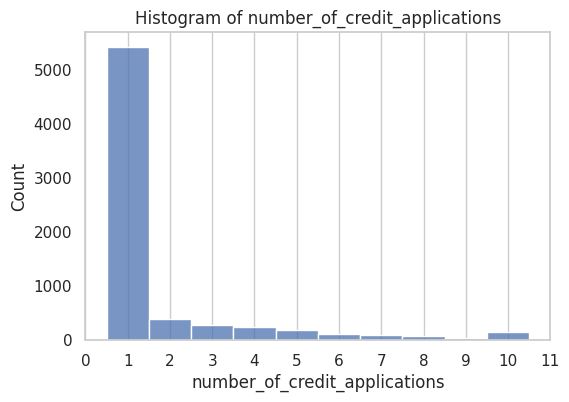

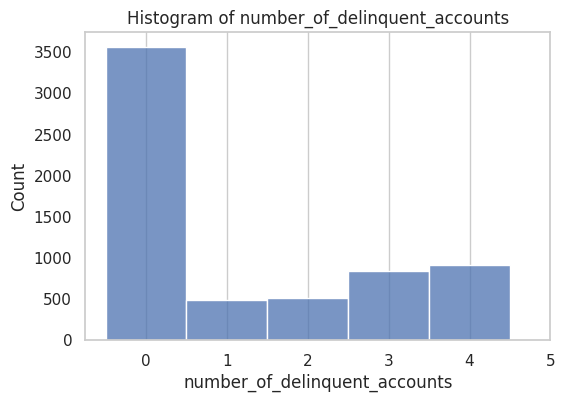

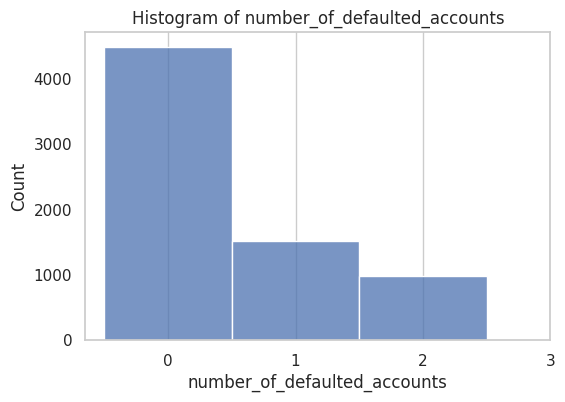

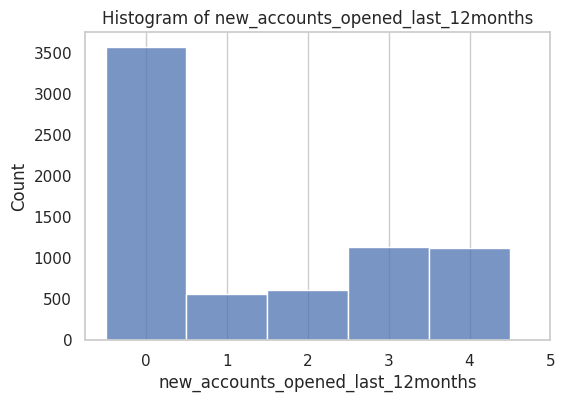

In [73]:
# histograms for understand the distributions and outliers
columns_to_plot1  = [
    'number_of_credit_applications',
    'number_of_delinquent_accounts',
    'number_of_defaulted_accounts',
    'new_accounts_opened_last_12months'
]

for column in columns_to_plot1:
    if column in sample_customer_data.select_dtypes(include='number').columns:
        max_value = int(sample_customer_data[column].max())
        bins = range(0, max_value + 2)

        plt.figure(figsize=(6,4))
        sns.histplot(data=sample_customer_data, x=column, bins=bins, discrete=True)
        plt.xticks(ticks=bins)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.grid(axis='y')
        plt.show()

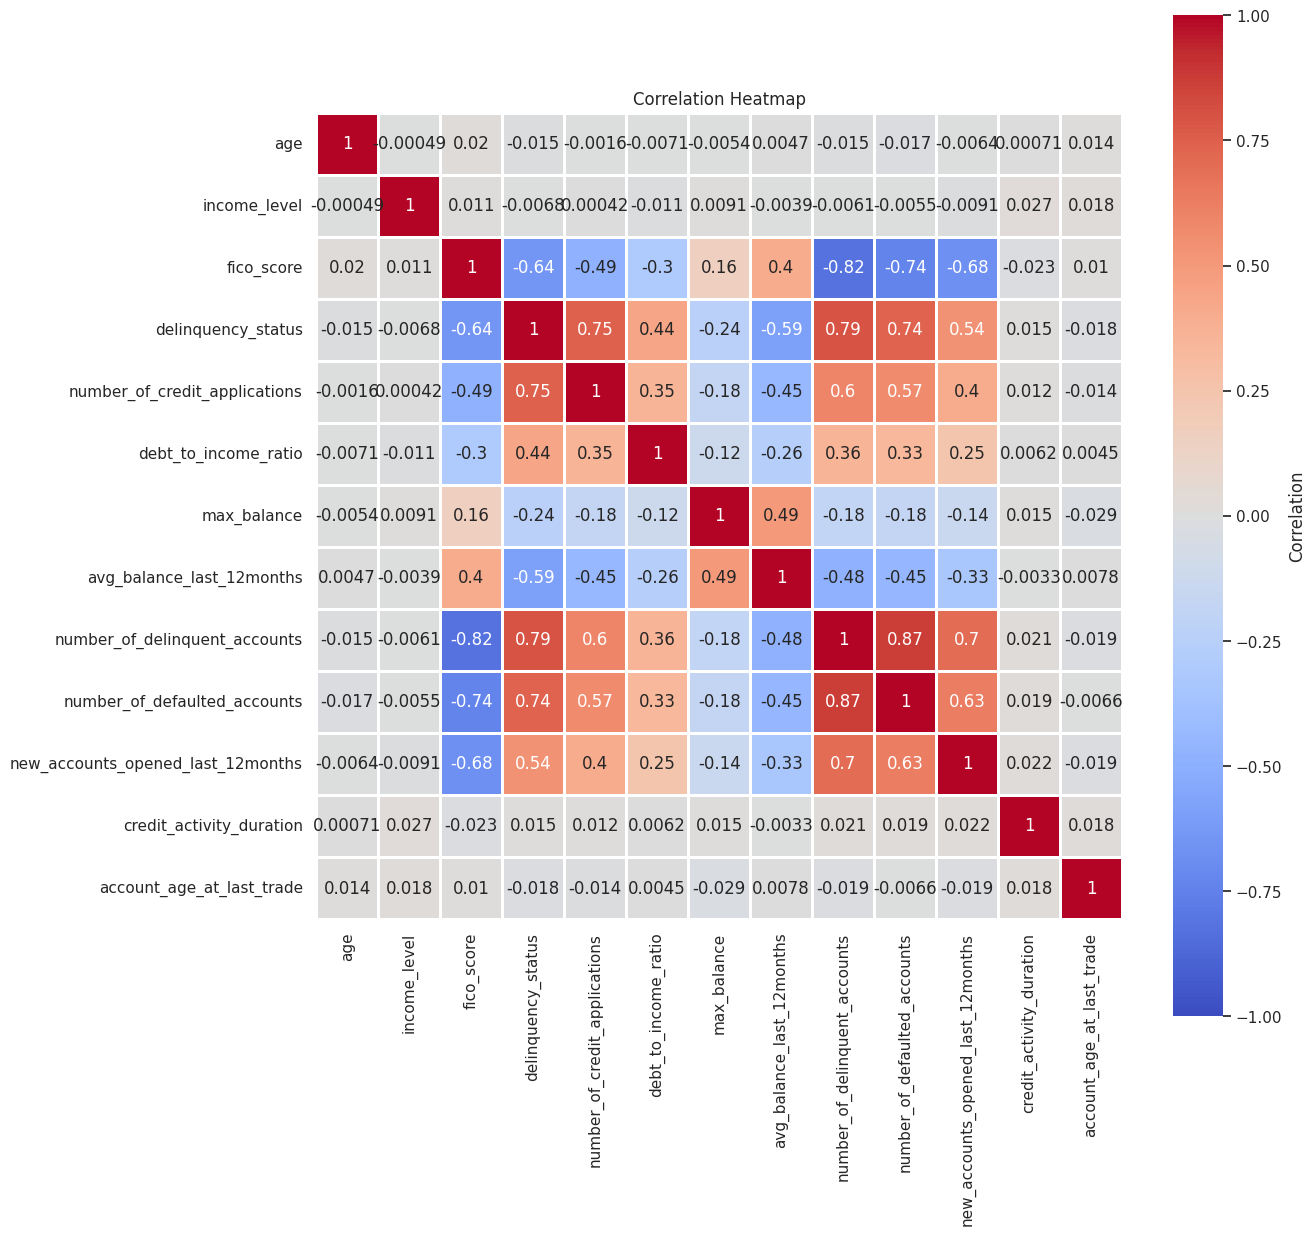

In [74]:
# heatmap for identifying relationships
plt.figure(figsize=(13, 13))
sns.heatmap(
    sample_customer_data.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Correlation'},
    square=True,
    linewidths=1,
    linecolor='white'
)
plt.title('Correlation Heatmap')
plt.show()

In [75]:
# identifying the relationship between categorical variables
from scipy.stats import chi2_contingency

categorical_columns = sample_customer_data.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != 'charge_off_status']

## performing Chi-Square test on pairs of categorical variables
p_values = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(sample_customer_data[col1], sample_customer_data[col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p_value
        else:
            p_values.loc[col1, col2] = None


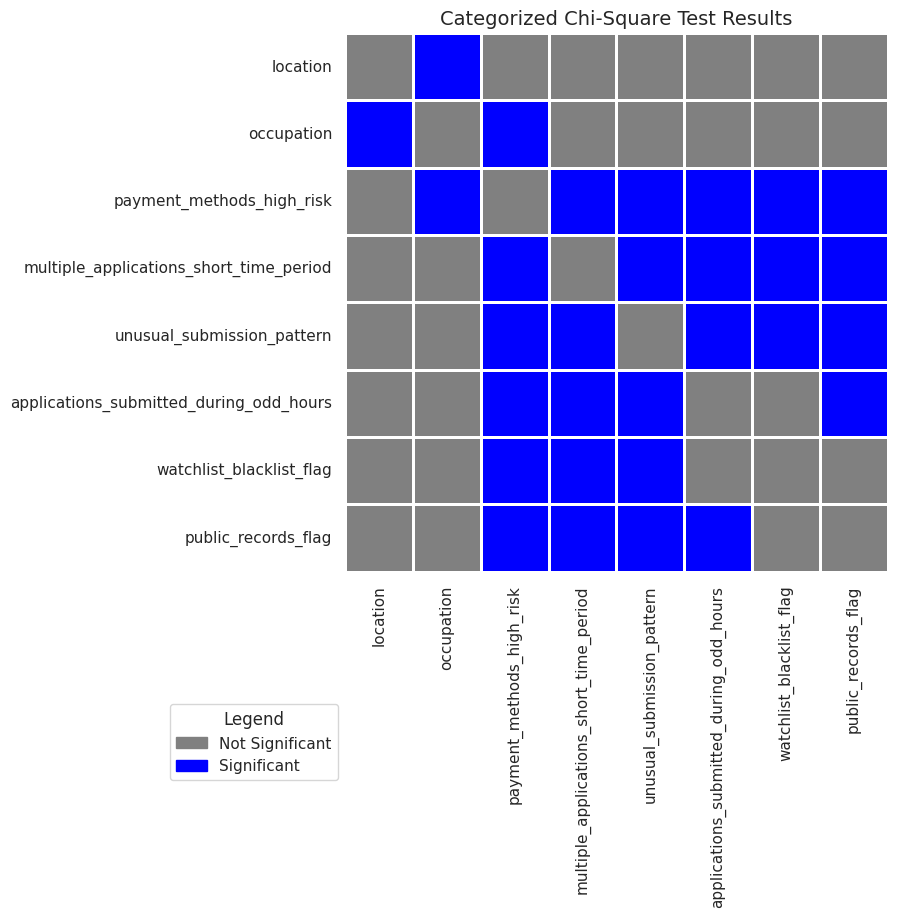

In [76]:
# identifying the relationship between categorical variables
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

p_values_category = p_values.applymap(lambda x: 1 if (x is not None and x < 0.05) else 0)

cmap = ListedColormap(['grey', 'blue'])

annotations = p_values_category.applymap(lambda x: 'Significant' if x == 1 else 'Not Significant')

plt.figure(figsize=(7, 7))
sns.heatmap(
    p_values_category,
    fmt='',
    cmap=cmap,
    linewidths=1,
    linecolor='white',
    xticklabels=True,
    yticklabels=True,
    cbar=False
)

legend_labels = ['Not Significant', 'Significant'] # adding a custom legend
legend_colors = ['grey', 'blue']
patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=patches, title='Legend', bbox_to_anchor=(0, -0.4), loc='lower right', fontsize=11)
plt.title('Categorized Chi-Square Test Results', fontsize=14)
plt.show()


In [77]:
# creating dummies for categorical variables
data = sample_customer_data[['location', 'occupation']]
data_encoded = pd.get_dummies(data, columns=['location', 'occupation'])
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   location_Atlanta               7000 non-null   bool 
 1   location_Boston                7000 non-null   bool 
 2   location_Chicago               7000 non-null   bool 
 3   location_Dallas                7000 non-null   bool 
 4   location_Houston               7000 non-null   bool 
 5   location_Los Angeles           7000 non-null   bool 
 6   location_Miami                 7000 non-null   bool 
 7   location_New York              7000 non-null   bool 
 8   location_San Francisco         7000 non-null   bool 
 9   location_Seattle               7000 non-null   bool 
 10  occupation_Accountant          7000 non-null   bool 
 11  occupation_Artist              7000 non-null   bool 
 12  occupation_Banker              7000 non-null   bool 
 13  occupation_Consult

In [78]:
# removing unnecessary coulumns
sample_customer_data = sample_customer_data.drop(columns = ['location', 'occupation','earliest_credit_account','recent_trade_activity','account_open_date'])

In [79]:
# adding dummy variables into the dataset
sample_customer_data = pd.concat([sample_customer_data, data_encoded], axis=1)
sample_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      7000 non-null   int64  
 1   income_level                             7000 non-null   int64  
 2   fico_score                               6790 non-null   float64
 3   delinquency_status                       7000 non-null   int64  
 4   charge_off_status                        7000 non-null   bool   
 5   number_of_credit_applications            7000 non-null   int64  
 6   debt_to_income_ratio                     7000 non-null   float64
 7   payment_methods_high_risk                7000 non-null   bool   
 8   max_balance                              7000 non-null   float64
 9   avg_balance_last_12months                6650 non-null   float64
 10  number_of_delinquent_accounts            6300 no

In [80]:
# identifying columns having missing values
columns_with_missing_values = sample_customer_data.columns[sample_customer_data.isnull().any()].tolist()
columns_with_missing_values

['fico_score', 'avg_balance_last_12months', 'number_of_delinquent_accounts']

In [81]:
# imputing missing values
from miceforest import ImputationKernel

mice_kernel_sample_customer_data = ImputationKernel(
data = sample_customer_data,
#save_all_iterations = True,
random_state = 993110
)

In [82]:
# creating the dataset after imputing missing values
mice_kernel_sample_customer_data.mice(5)
mice_imputed_sample_customer_data = mice_kernel_sample_customer_data.complete_data()

mice_imputed_sample_customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      7000 non-null   int64  
 1   income_level                             7000 non-null   int64  
 2   fico_score                               7000 non-null   float64
 3   delinquency_status                       7000 non-null   int64  
 4   charge_off_status                        7000 non-null   bool   
 5   number_of_credit_applications            7000 non-null   int64  
 6   debt_to_income_ratio                     7000 non-null   float64
 7   payment_methods_high_risk                7000 non-null   bool   
 8   max_balance                              7000 non-null   float64
 9   avg_balance_last_12months                7000 non-null   float64
 10  number_of_delinquent_accounts            7000 no

In [83]:
missing_values_after_imputing = mice_imputed_sample_customer_data.isnull().sum()

print("Number of missing values per variables:")
print(missing_values_after_imputing)

Number of missing values per variables:
age                                        0
income_level                               0
fico_score                                 0
delinquency_status                         0
charge_off_status                          0
number_of_credit_applications              0
debt_to_income_ratio                       0
payment_methods_high_risk                  0
max_balance                                0
avg_balance_last_12months                  0
number_of_delinquent_accounts              0
number_of_defaulted_accounts               0
new_accounts_opened_last_12months          0
multiple_applications_short_time_period    0
unusual_submission_pattern                 0
applications_submitted_during_odd_hours    0
watchlist_blacklist_flag                   0
public_records_flag                        0
credit_activity_duration                   0
account_age_at_last_trade                  0
location_Atlanta                           0
location_Boston

### **Modeling**

In [84]:
df = mice_imputed_sample_customer_data
df.shape
df.head()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,...,occupation_Artist,occupation_Banker,occupation_Consultant,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Other,occupation_Retail Worker,occupation_Software Developer,occupation_Teacher
0,56,40099,424.0,108,True,10,3.139572,False,18209.383136,4324.930673,...,False,False,False,False,False,False,False,False,False,True
1,69,2050,483.0,0,False,1,1.017489,False,33673.696504,21726.593916,...,False,False,False,False,True,False,False,False,False,False
2,46,71936,566.0,0,False,1,1.508626,False,101918.174202,63930.102255,...,False,False,False,False,True,False,False,False,False,False
3,32,15833,460.0,97,True,5,2.995150,False,9055.101659,3033.403742,...,False,True,False,False,False,False,False,False,False,False
4,60,8574,787.0,0,False,1,1.182380,False,91682.852040,77457.387016,...,False,False,False,False,False,True,False,False,False,False


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      7000 non-null   int64  
 1   income_level                             7000 non-null   int64  
 2   fico_score                               7000 non-null   float64
 3   delinquency_status                       7000 non-null   int64  
 4   charge_off_status                        7000 non-null   bool   
 5   number_of_credit_applications            7000 non-null   int64  
 6   debt_to_income_ratio                     7000 non-null   float64
 7   payment_methods_high_risk                7000 non-null   bool   
 8   max_balance                              7000 non-null   float64
 9   avg_balance_last_12months                7000 non-null   float64
 10  number_of_delinquent_accounts            7000 no

## Train Test Split

In [86]:
df.columns

Index(['age', 'income_level', 'fico_score', 'delinquency_status',
       'charge_off_status', 'number_of_credit_applications',
       'debt_to_income_ratio', 'payment_methods_high_risk', 'max_balance',
       'avg_balance_last_12months', 'number_of_delinquent_accounts',
       'number_of_defaulted_accounts', 'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag', 'credit_activity_duration',
       'account_age_at_last_trade', 'location_Atlanta', 'location_Boston',
       'location_Chicago', 'location_Dallas', 'location_Houston',
       'location_Los Angeles', 'location_Miami', 'location_New York',
       'location_San Francisco', 'location_Seattle', 'occupation_Accountant',
       'occupation_Artist', 'occupation_Banker', 'occupation_Consultant',
       'occupation_Doctor', 'occupation_Engineer', 'occupation_Lawyer',
  

In [87]:
features = ['age', 'income_level', 'fico_score', 'delinquency_status',
             'number_of_credit_applications','debt_to_income_ratio',
             'payment_methods_high_risk', 'max_balance',
       'avg_balance_last_12months', 'number_of_delinquent_accounts',
       'number_of_defaulted_accounts', 'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag', 'credit_activity_duration',
       'account_age_at_last_trade', 'location_Atlanta', 'location_Boston',
       'location_Chicago', 'location_Dallas', 'location_Houston',
       'location_Los Angeles', 'location_Miami', 'location_New York',
       'location_San Francisco', 'location_Seattle', 'occupation_Accountant',
       'occupation_Artist', 'occupation_Banker', 'occupation_Consultant',
       'occupation_Doctor', 'occupation_Engineer', 'occupation_Lawyer',
       'occupation_Other', 'occupation_Retail Worker',
       'occupation_Software Developer', 'occupation_Teacher']

target = ['charge_off_status']

In [88]:
X = df[features]
y = df[target]

In [89]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3)

# standardize + pca

In [90]:
std_scaler = StandardScaler().fit(X_tr, y_tr)
X_tr = std_scaler.transform(X_tr)
X_ts = std_scaler.transform(X_ts)

In [91]:
pca = PCA().fit(X_tr, y_tr)
X_tr = pca.transform(X_tr)
X_ts = pca.transform(X_ts)

# model_factory

In [92]:
def model_factory(X_tr=X_tr, X_ts=X_ts, y_tr=y_tr, y_ts=y_ts, model=None):
  model.fit(X_tr, y_tr)
  score_tr = model.score(X_tr, y_tr)
  score_ts = model.score(X_ts, y_ts)

  return model, score_tr, score_ts

# RandomForest

In [93]:
rf = RandomForestClassifier()
rf, score_tr_rf, score_ts_rf = model_factory(model=rf)

# bagging classifier

In [94]:
bag = BaggingClassifier()
bag, score_tr_bag, score_ts_bag = model_factory(model=bag)

# adaboosting

In [95]:
ada = AdaBoostClassifier()
ada, score_tr_ada, score_ts_ada = model_factory(model=ada)

# gradient boosting

In [96]:
gbc = GradientBoostingClassifier()
gbc, score_tr_gbc, score_ts_gbc = model_factory(model=gbc)

# score summary

In [97]:
tr_scores = [score_tr_rf, score_tr_bag, score_tr_ada, score_tr_gbc]
ts_scores = [score_ts_rf, score_ts_bag, score_ts_ada, score_ts_gbc]
models = ['randforest', 'bagging', 'adaboost', 'gradientboost']
dict_scores = {
    'train_score':tr_scores,
    'test_score':ts_scores
}
pd.DataFrame(dict_scores, index=models)

,train_score,test_score
randforest,1.000000,0.866190
bagging,0.979796,0.849048
adaboost,0.860816,0.858095
gradientboost,0.875714,0.862857
